**Applied Machine Learning - Homework Question 1**

**Group Members:**

1. Yash Takte
2. Sejal Nimkar
3. Neha Kothavade

In [1016]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [1017]:
# Load the dataset
df=pd.read_csv('D:\MS\Indiana University Bloomington\Classes\Applied Machine Learning (Zoran Tiganj - CSCI-P 556)\Homework\Homework 1 Q1\happiness_data.csv')

# **A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?**

In [1019]:
df.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [1020]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [1021]:
# Shape of the dataset
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 1949
Total number of columns: 11


In [1022]:
def categorize_attributes(df):
    continuous = []
    categorical = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continuous.append(col)
        else:
            categorical.append(col)
    
    return continuous, categorical

# Categorize attributes
continuous_attrs, categorical_attrs = categorize_attributes(df)

print("Continuous Attributes:", continuous_attrs)
print("Categorical Attributes:", categorical_attrs)

Continuous Attributes: ['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
Categorical Attributes: ['Country name']


**Question A**

**Answer :** The dataset contains 1949 rows and 11 columns. The continuous-valued features are Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, and Life Ladder (which is the target variable). The categorical feature is Country name. The Year attribute (continuous-valued feature) is present but can be ignored for predictions.

# **B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [1025]:
# Count missing values
print("Missing values:")
print(df.isna().sum())

Missing values:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [1026]:
# Counting duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows}")

Total number of duplicate rows: 0


In [1027]:
# Calculate global medians for numeric columns only
global_medians = df.select_dtypes(include=['float64', 'int64']).median()

# Fill missing values by grouping by 'Country name' and applying group median or global median
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    if df[column].isnull().any():
        df[column] = df.groupby('Country name')[column].transform(
            lambda x: x.fillna(x.median()) if x.count() > 1 else x.fillna(global_medians[column])
        )

# Check for remaining missing values after cleaning
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


In [1028]:
# Display statistical summary for all features
print("Statistical summary of the dataset:")
stats_summary = df.describe(include='all')
print(stats_summary)

Statistical summary of the dataset:
       Country name         year  Life Ladder  Log GDP per capita  \
count          1949  1949.000000  1949.000000         1949.000000   
unique          166          NaN          NaN                 NaN   
top        Zimbabwe          NaN          NaN                 NaN   
freq             15          NaN          NaN                 NaN   
mean            NaN  2013.216008     5.466705            9.371621   
std             NaN     4.166828     1.115711            1.146754   
min             NaN  2005.000000     2.375000            6.635000   
25%             NaN  2010.000000     4.640000            8.473000   
50%             NaN  2013.000000     5.386000            9.460000   
75%             NaN  2017.000000     6.283000           10.347000   
max             NaN  2020.000000     8.019000           11.648000   

        Social support  Healthy life expectancy at birth  \
count      1949.000000                       1949.000000   
unique         

***The descriptive statistics for each attribute are shown in the table above.***

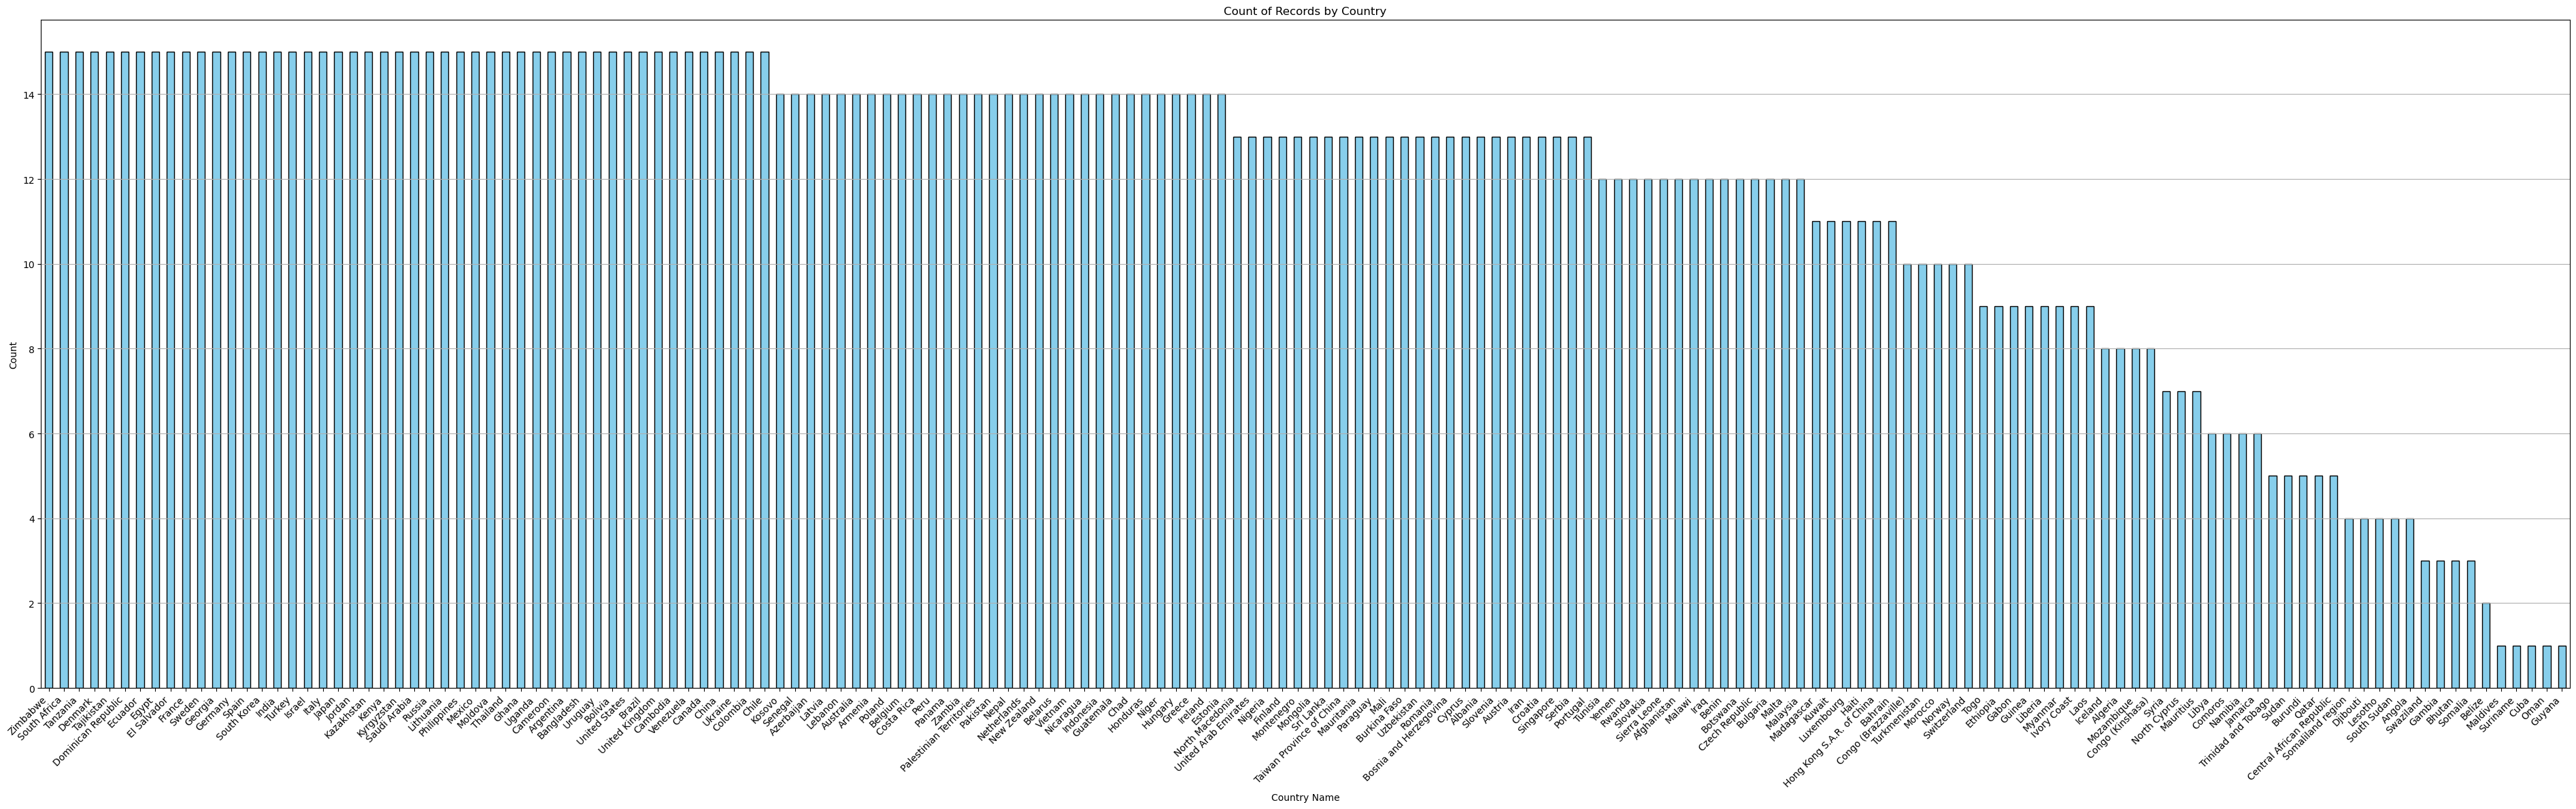

In [1030]:
# Count of Records by Country
country_counts = df['Country name'].value_counts()
plt.figure(figsize=(38, 12))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.title('Count of Records by Country')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [1031]:
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Life Ladder']

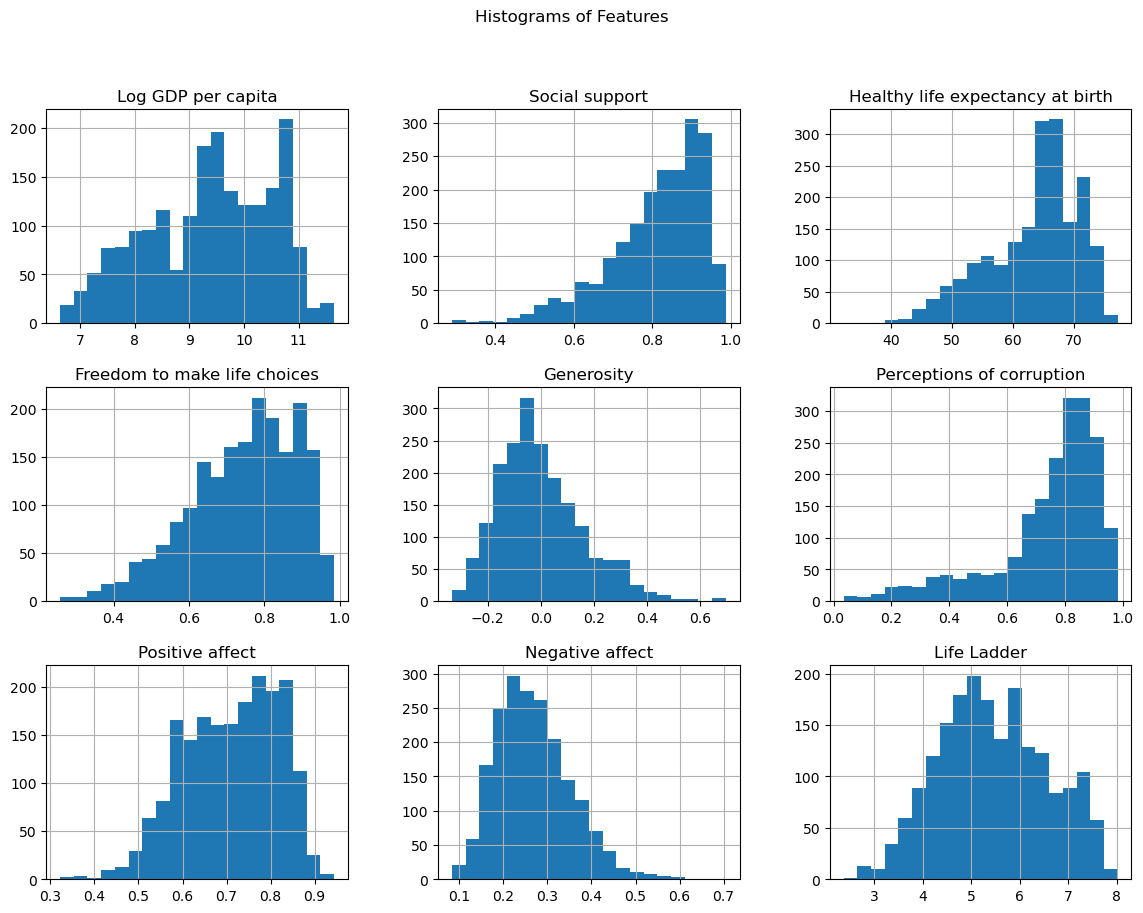

In [1032]:
# Plot histograms for features
df[features].hist(figsize=(14, 10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

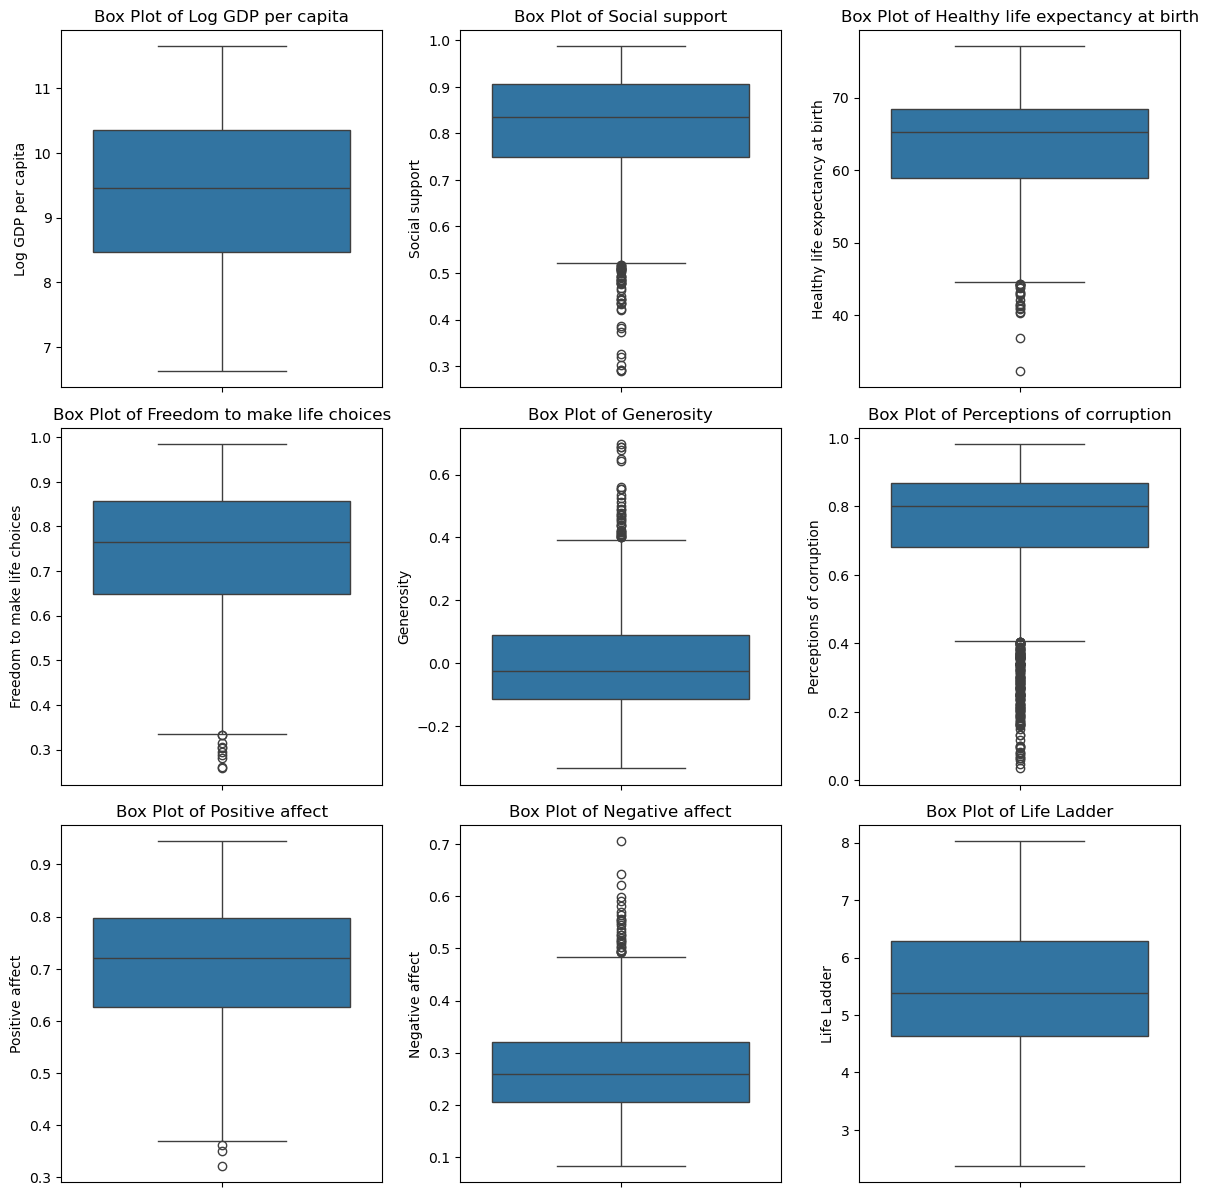

In [1033]:
# Plot box plots for features
plt.figure(figsize=(12, 16))
for i, column in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

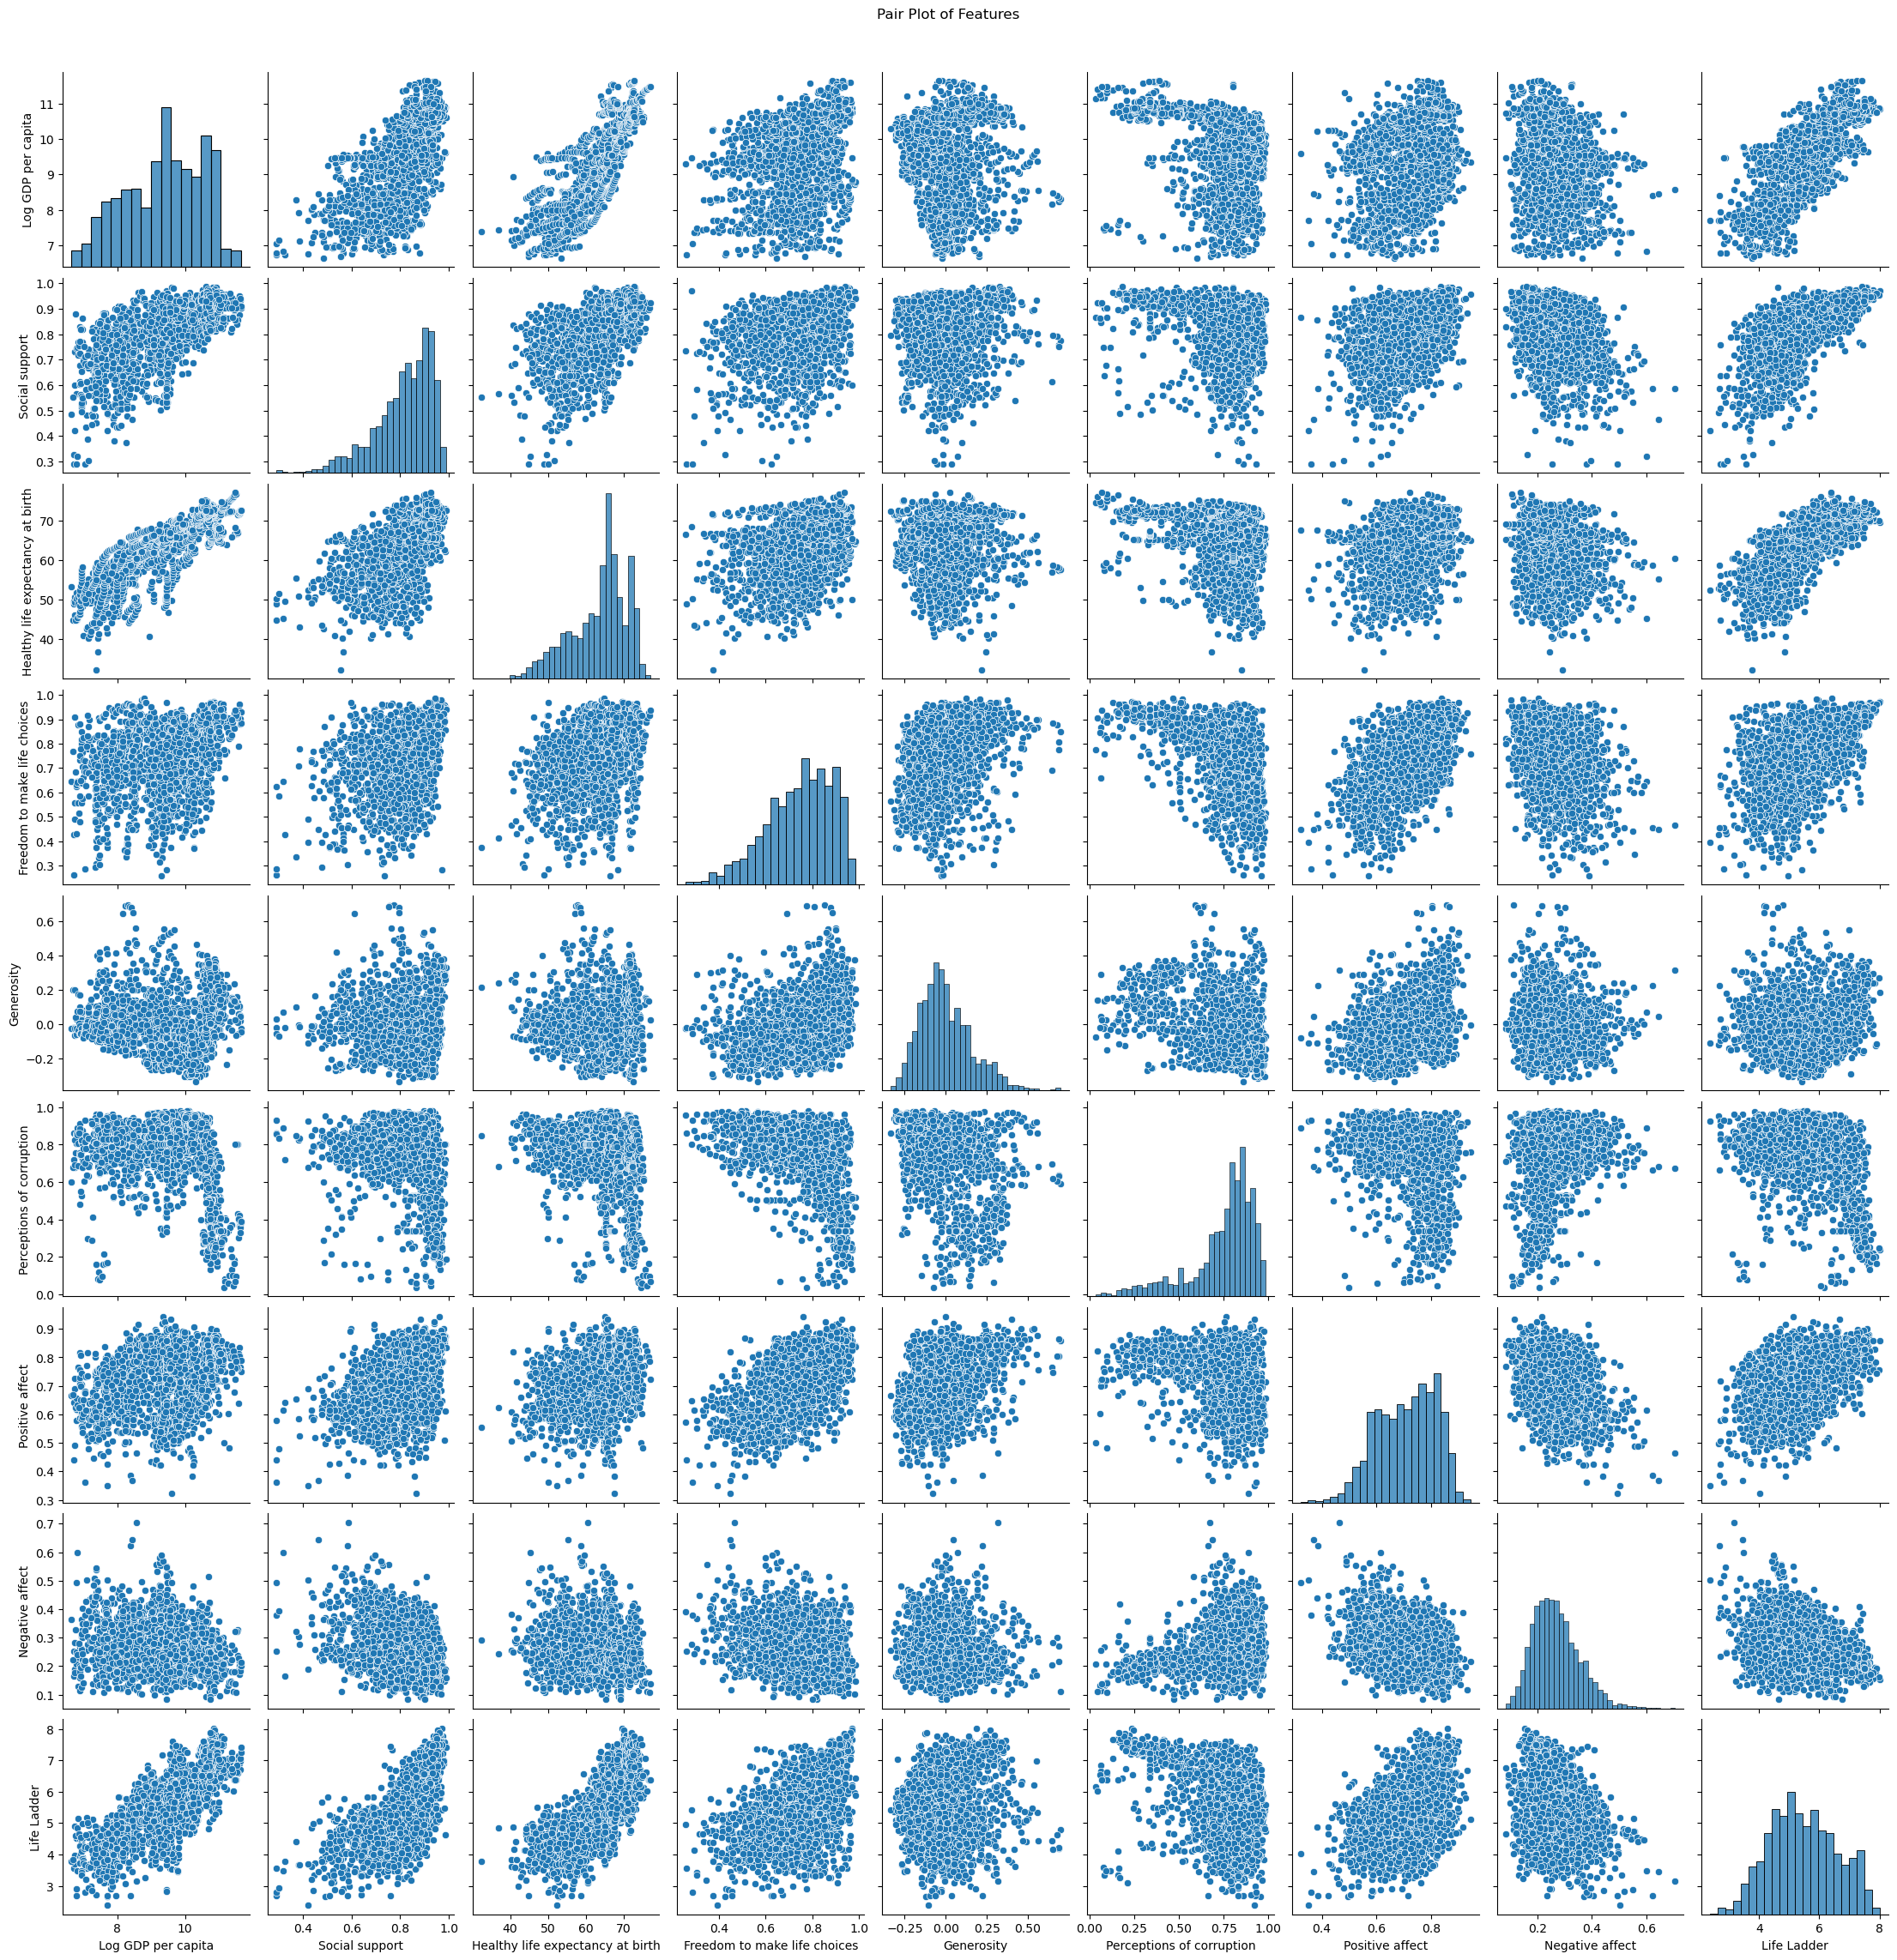

In [1034]:
# Pair Plot of Features
pair_plot = sns.pairplot(df[features])
pair_plot.fig.suptitle('Pair Plot of Features', y=1.02)  
plt.show()

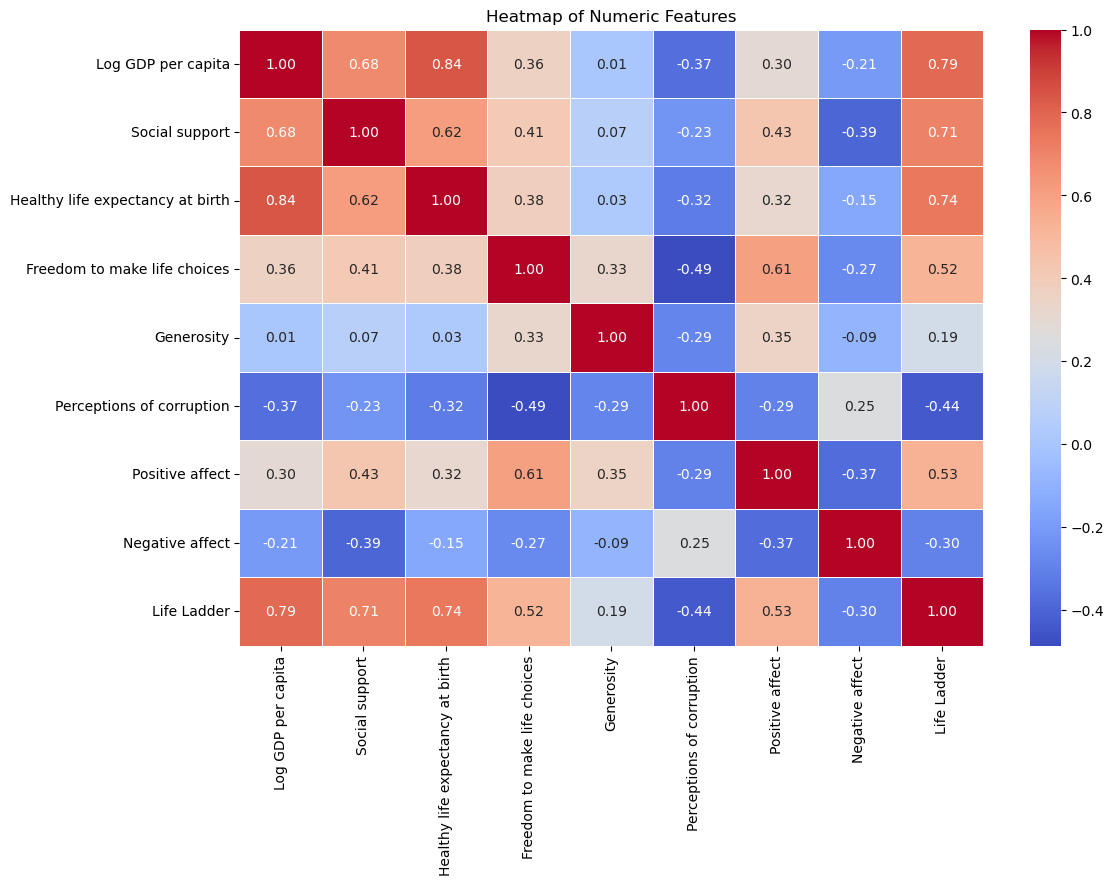

In [1035]:
# Heatmap for the uncleaned data
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Numeric Features')
plt.show()

***Above are some of the visualizations, including histograms, box plots, pair plot for the features, bar plot for 'Country name' along with the heatmap for the uncleaned data.***

**Explain noticeable traits for key attributes & special treatment needed for key attributes.**

**Answer** **:** 

**Traits:**
1. **Log GDP per capita:** Strongly correlated with life satisfaction.
2. **Social support:** Positively correlated with happiness.
3. **Healthy life expectancy at birth:** Longer life expectancy contributes to higher life satisfaction.
4. **Freedom to make life choices:** Moderately correlated with happiness.
5. **Generosity:** Weak correlation with life satisfaction.
6. **Perceptions of corruption:** Negatively correlated with life satisfaction.
7. **Positive affect:** Positively correlated with happiness.
8. **Negative affect:** Negatively correlated with life satisfaction.
9. **Country name:** No significant correlation with life satisfaction.

**Special Treatment:**
1. **Log GDP per capita:** Normalize or standardize.
2. **Social support:** Handle missing values.
3. **Healthy life expectancy at birth:** Normalize, handle missing values, and manage outliers.
4. **Freedom to make life choices:** Handle missing values.
5. **Generosity:** Handle missing values.
6. **Perceptions of corruption:** Manage outliers and handle missing values.
7. **Positive affect:** Handle missing values.
8. **Negative affect:** Manage outliers and handle missing values.
9. **Country name:** Drop from the analysis (no need for encoding).

In [1038]:
def remove_outliers_iqr(df, features):

    df_cleaned = df.copy()
    
    for column in features:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame based on the current column
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        
    return df_cleaned

df_cleaned = remove_outliers_iqr(df, features)

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (1949, 11)
Cleaned shape: (1657, 11)


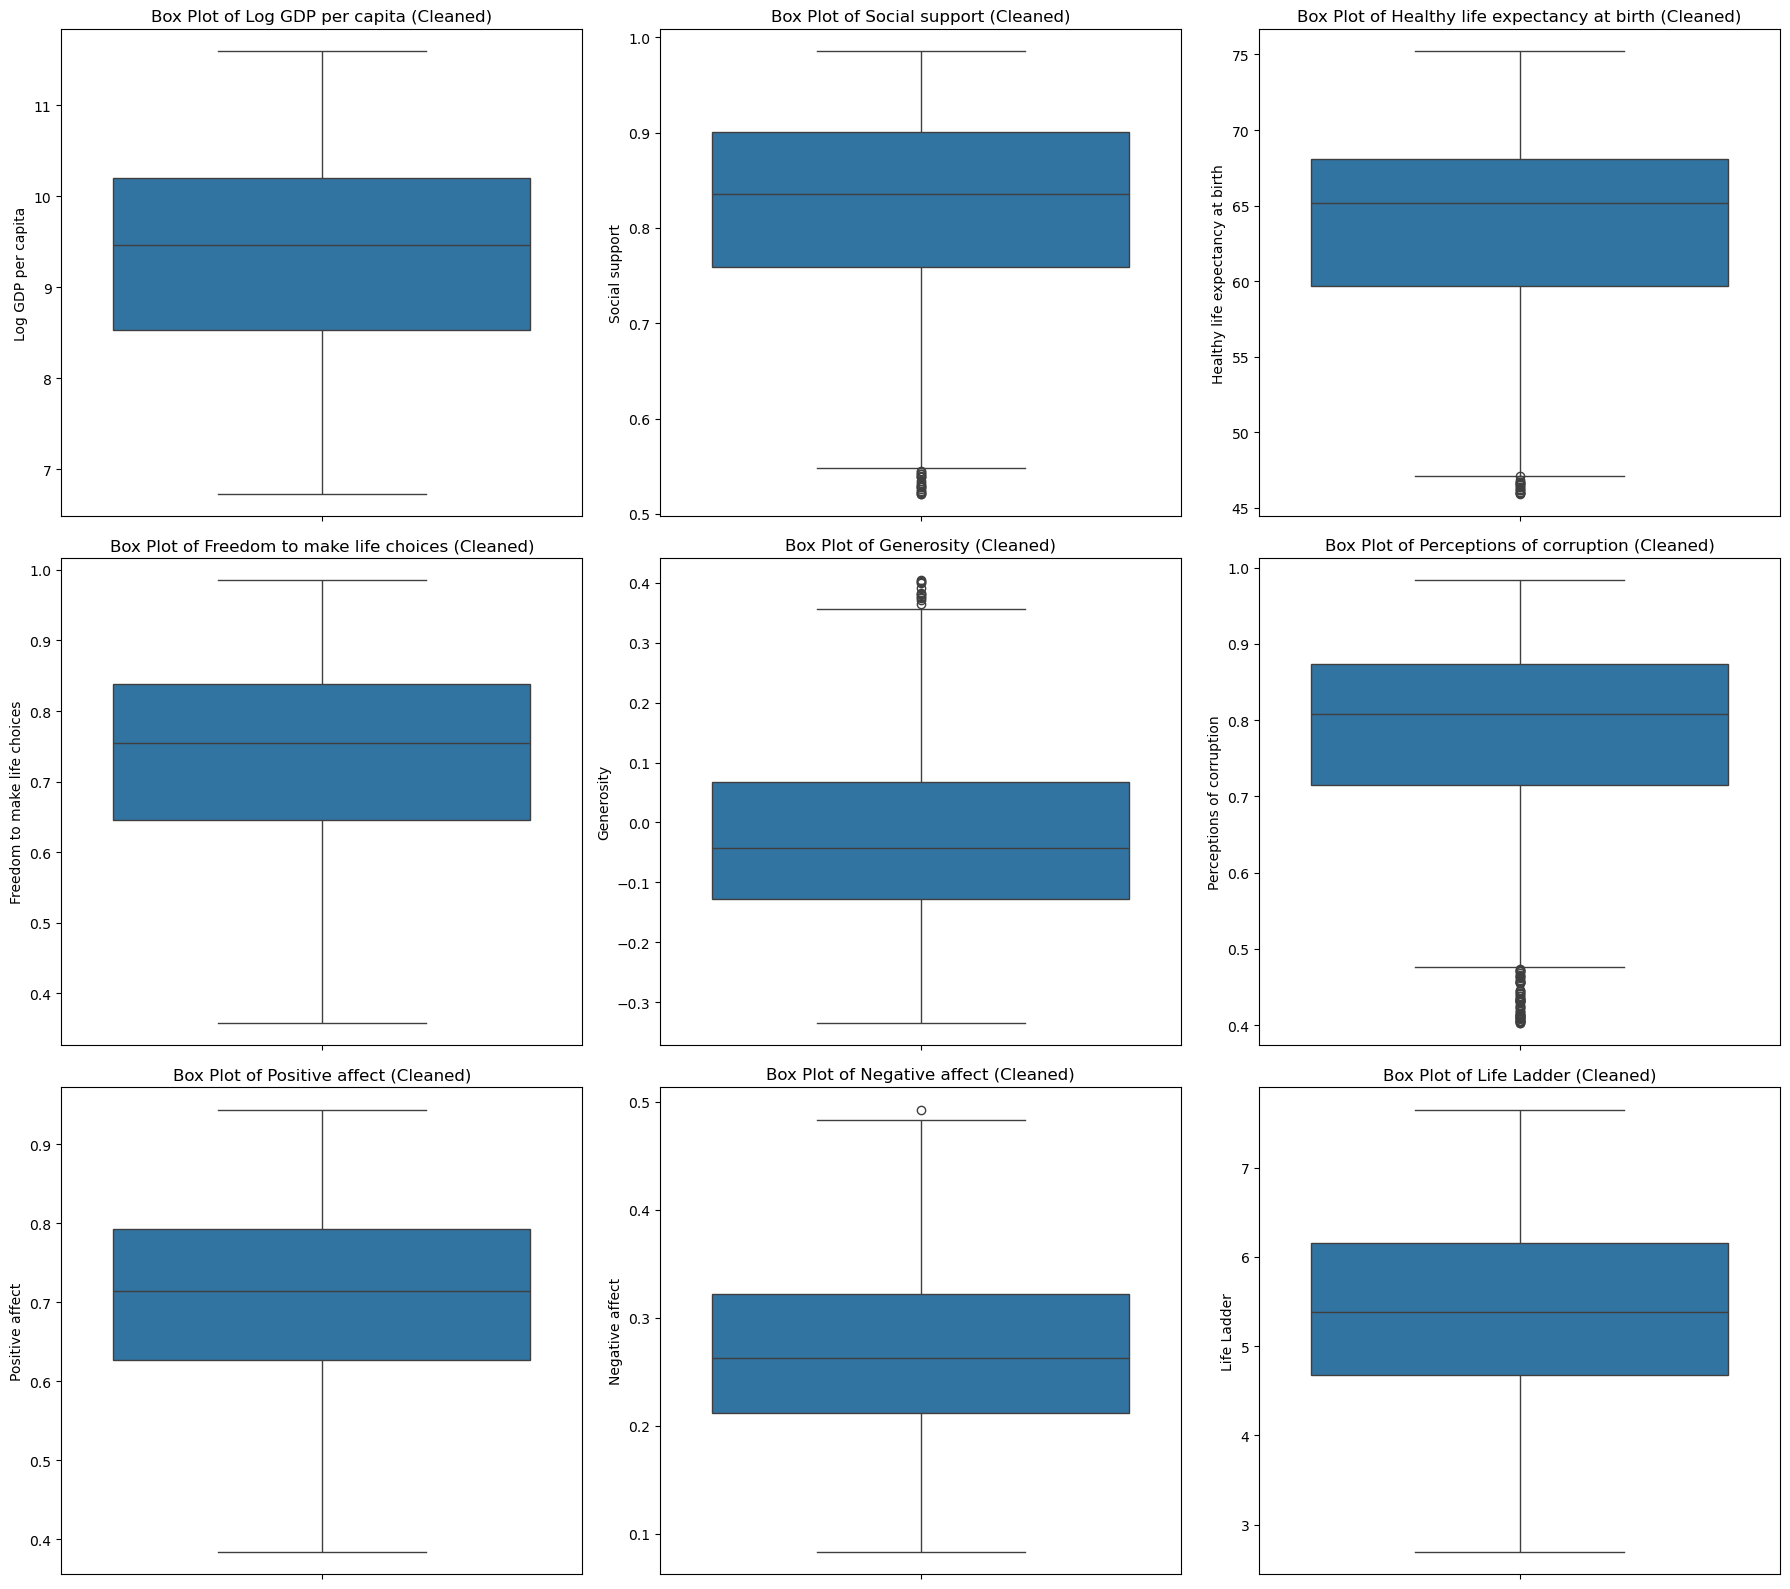

In [1039]:
# Plot box plots for features after removing outliers
plt.figure(figsize=(18, 16))
for i, column in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_cleaned[column]) 
    plt.title(f'Box Plot of {column} (Cleaned)')
plt.tight_layout()
plt.show()

**Currently, we will remove outliers and fill missing values only after splitting our dataset into training and testing sets. At that point, we will use StandardScaler to scale the features, ensuring that all features contribute equally to the model's performance.**

# **C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

In [1042]:
attributes = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
label = 'Life Ladder'

In [1043]:
# Compute the correlation matrix
correlation_matrix = df_cleaned[attributes + [label]].corr()

pcc_with_label = correlation_matrix[label].drop(label)

pcc_table = pd.DataFrame({
    'Feature': pcc_with_label.index,
    'Pearson Correlation Coefficient': pcc_with_label.values
})

print(pcc_table)

                            Feature  Pearson Correlation Coefficient
0                Log GDP per capita                         0.745844
1                    Social support                         0.664471
2  Healthy life expectancy at birth                         0.715779
3      Freedom to make life choices                         0.445315
4                        Generosity                         0.177946
5         Perceptions of corruption                        -0.332850
6                   Positive affect                         0.477867
7                   Negative affect                        -0.187127


Text(0.5, 1.0, 'Heatmap of Correlation Matrix (Cleaned Data)')

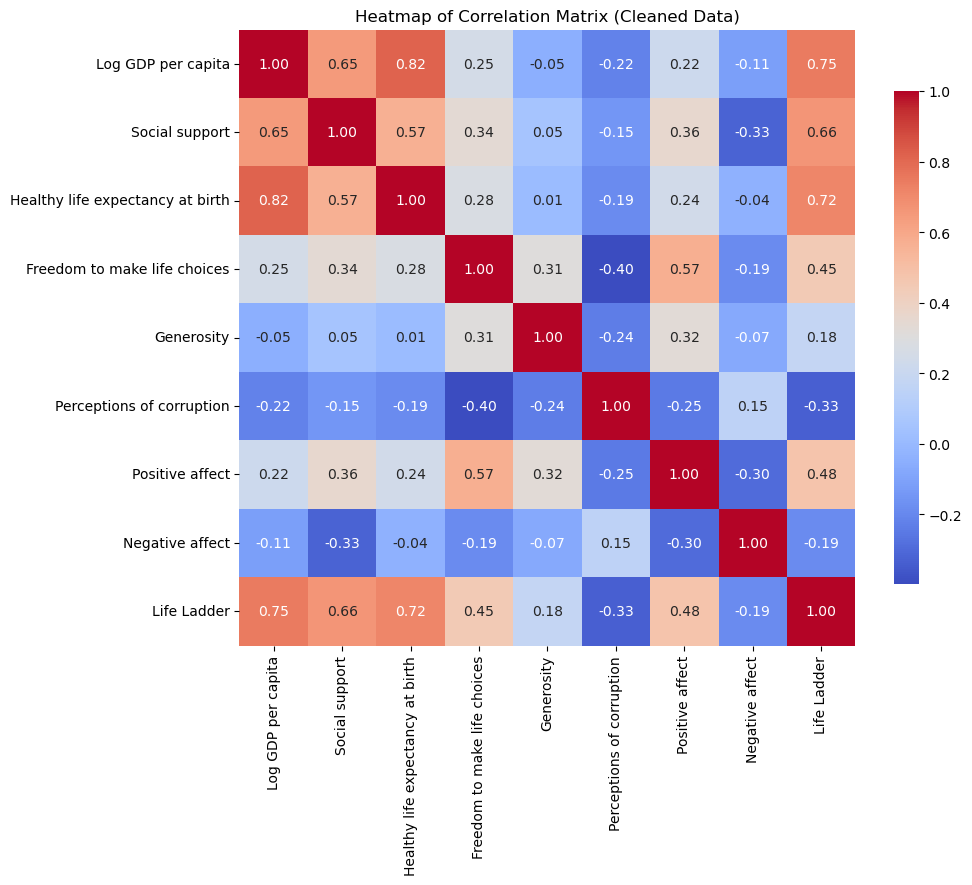

In [1044]:
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap of Correlation Matrix (Cleaned Data)')

***Above is the computed correlation matrix & heatmap of correlation matrix.***

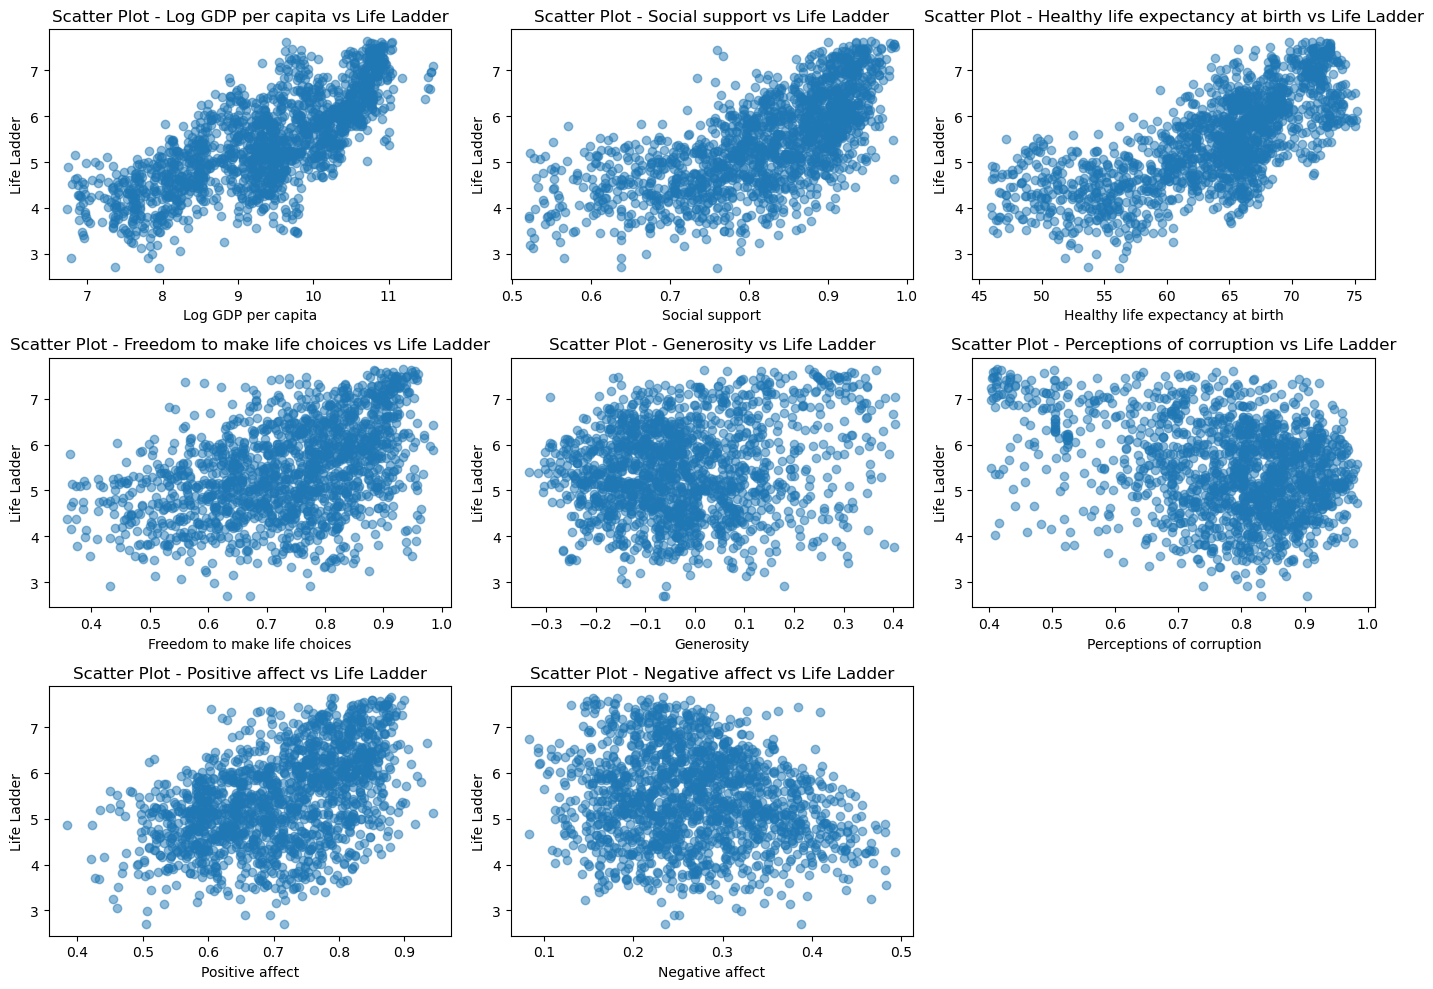

In [1046]:
# Create scatter plots to visualize relationships
plt.figure(figsize=(14, 10))
for i, feature in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df_cleaned[feature], df_cleaned[label], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(label)
    plt.title(f'Scatter Plot - {feature} vs {label}')
plt.tight_layout()
plt.show()

***Above are the scatter plots.***

**Question C**\
**Discussion** **:** The Pearson Correlation Coefficients highlight the relationships between different features and life happiness scores (Life Ladder). Log GDP per capita (0.7458) and Healthy life expectancy (0.7158) have the strongest positive correlations, showing that higher income and better health are strongly linked to greater happiness. Social support (0.6645) also has a significant positive impact, indicating that strong relationships boost happiness. On the other hand, Generosity (0.1779) shows a weaker positive link. Negative correlations are seen with Perceptions of corruption (-0.3329) and Negative affect (-0.1871), suggesting that higher corruption and negative emotions reduce happiness. Freedom to make life choices (0.4453) and Positive affect (0.4779) are positively related but to a lesser degree. These findings show that while economic and health factors strongly influence happiness, social and emotional factors also play important roles.

# **D. Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

In [1050]:
df_cleaned.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   
6  Afghanistan  2014        3.131               7.718           0.526   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   
6                             52.88                         0.509       0.104   

   Perceptions of corruption  Positive affect  Negative affect  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268  
6                      0.871            0.532            0.375

In [1051]:
# Shuffle the dataset
df_shuffled = df_cleaned.sample(frac=1, random_state=42).reset_index(drop=True)

X = df_shuffled.drop(columns=['Life Ladder', 'Country name', 'year'])
y = df_shuffled['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1052]:
X.head()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0              10.224           0.887                             61.76   
1               9.725           0.894                             65.50   
2               9.568           0.853                             64.72   
3              10.671           0.921                             72.40   
4              10.287           0.882                             69.40   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.840       0.141                      0.917   
1                         0.855      -0.121                      0.760   
2                         0.670       0.069                      0.902   
3                         0.903      -0.102                      0.627   
4                         0.884      -0.102                      0.837   

   Positive affect  Negative affect  
0            0.798            0.229  
1            0.739            0.275  
2            0.548            0.320  
3            0.781            0.281  
4            0.858            0.244

In [1053]:
y.head()

0    5.832
1    5.605
2    4.653
3    6.959
4    6.118
Name: Life Ladder, dtype: float64

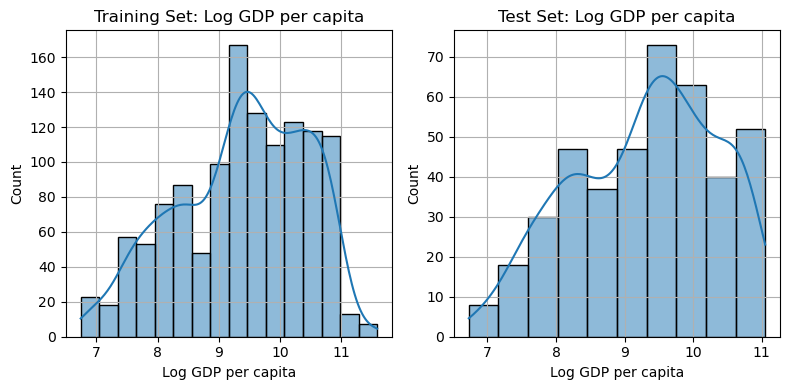

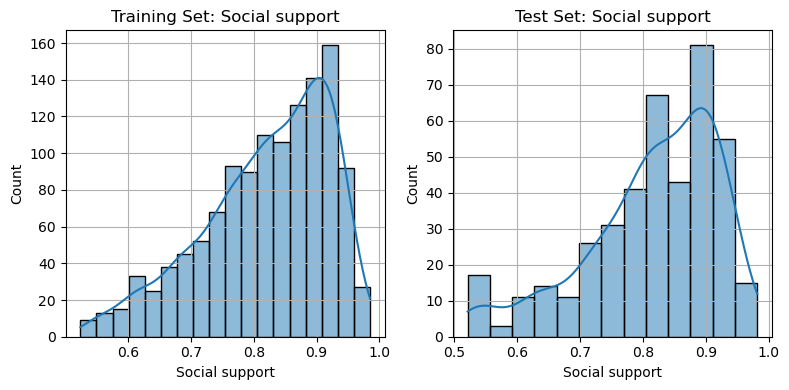

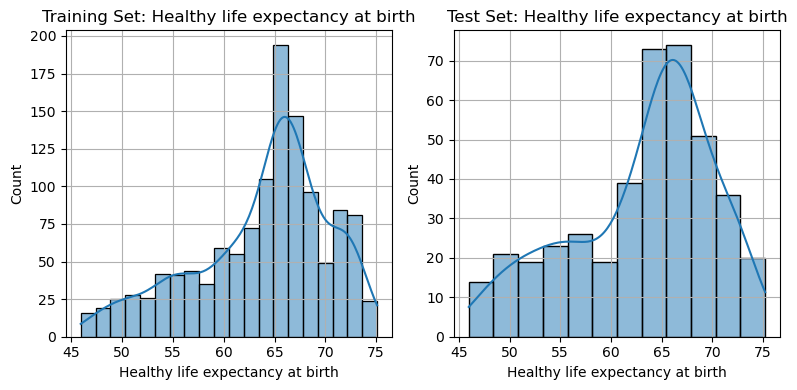

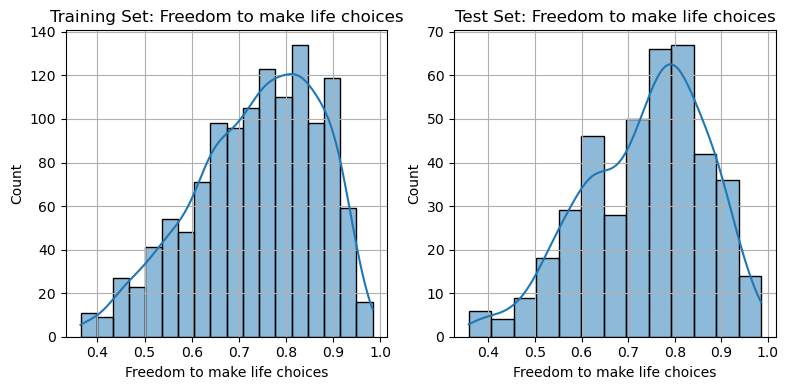

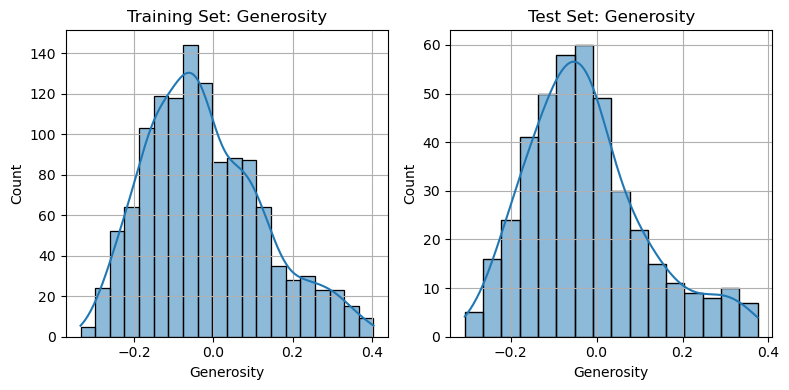

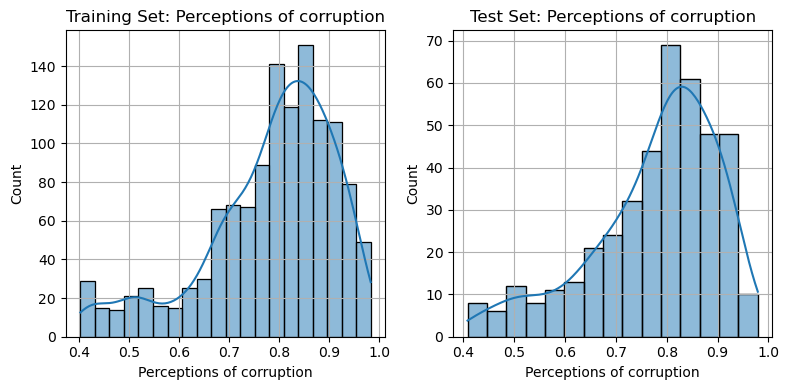

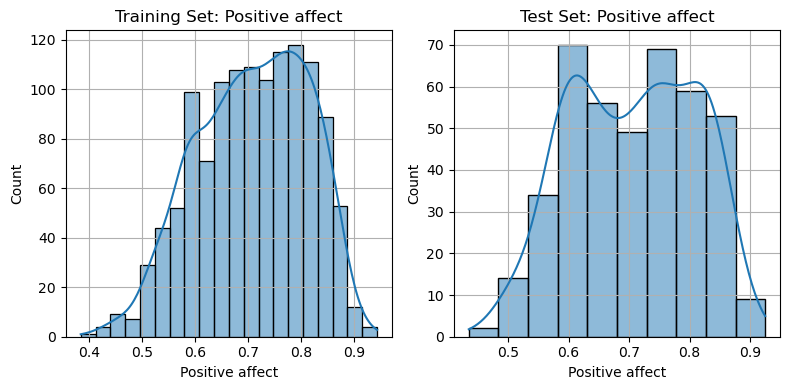

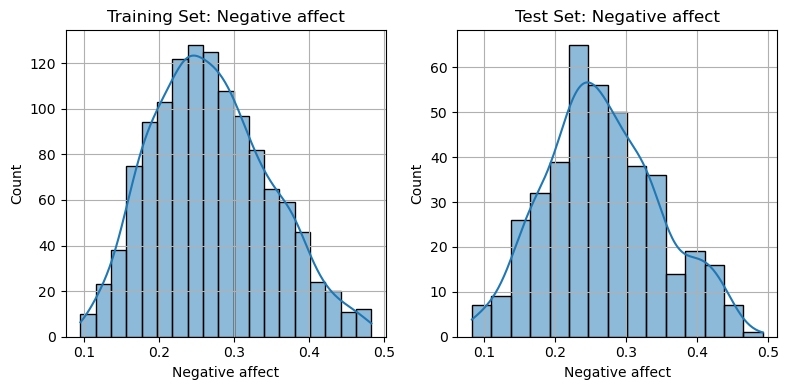

In [1054]:
key_attributes = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

for attribute in key_attributes:
    plt.figure(figsize=(8, 4))

    # Training Set
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[attribute], kde=True)
    plt.title(f'Training Set: {attribute}')
    plt.grid()

    # Test Set
    plt.subplot(1, 2, 2)
    sns.histplot(X_test[attribute], kde=True)
    plt.title(f'Test Set: {attribute}')
    plt.grid()

    plt.tight_layout()
    plt.show()

**Question D**\
**Answer :** To select 25% of the data for testing, we first shuffled the dataset to mix up the rows and ensure randomness. Then, we used the train_test_split function from Scikit-Learn to automatically divide the data into training and test sets, with 25% allocated to the test set. This approach ensures that the test data is a random sample, increasing its representativeness. We also checked the shape of both the training and test sets to confirm their sizes and compared the distributions of key features between the two sets to ensure they reflect the characteristics of the entire dataset.

In [1056]:
# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1242, 8)
y_train shape: (1242,)
X_test shape: (415, 8)
y_test shape: (415,)


In [1057]:
# Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **E. Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.**

**Question-E Part 1**

Linear Regression (Closed Form) - Test MSE: 0.2370, CV MSE: 0.2959, R² Score: 0.7561


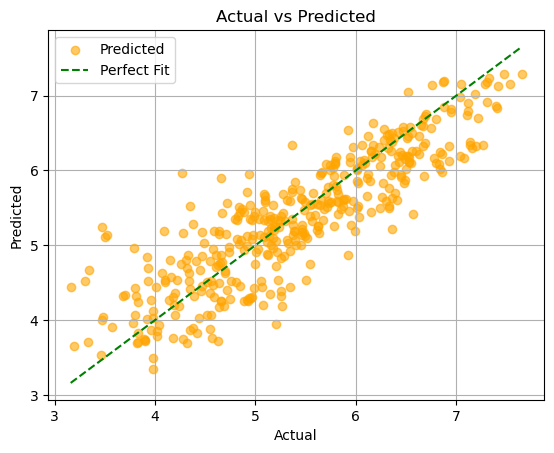

In [1060]:
# Linear Regression (Closed Form)
linear_model = LinearRegression()

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()

linear_model.fit(X_train_scaled, y_train)

y_test_pred = linear_model.predict(X_test_scaled)
test_mse_linear = mean_squared_error(y_test, y_test_pred)
r2_linear = r2_score(y_test, y_test_pred)
print(f"Linear Regression (Closed Form) - Test MSE: {test_mse_linear:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_linear:.4f}")

plt.scatter(y_test, y_test_pred, alpha=0.6, c='orange', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

SGD Regressor - Test MSE: 0.2474, CV MSE: 0.3129, R² Score: 0.7454


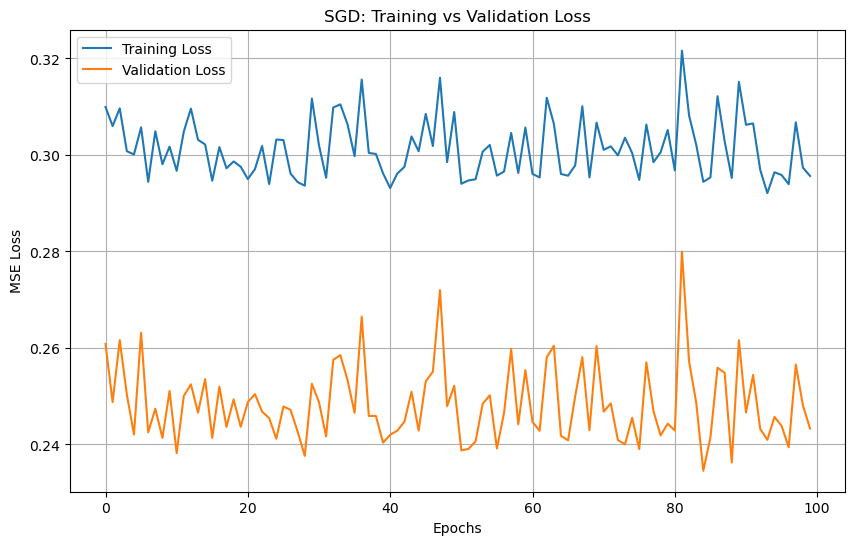

In [1061]:
# SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(sgd_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()

sgd_model.fit(X_train_scaled, y_train)

y_test_pred = sgd_model.predict(X_test_scaled)
test_mse_sgd = mean_squared_error(y_test, y_test_pred)
r2_sgd = r2_score(y_test, y_test_pred)

print(f"SGD Regressor - Test MSE: {test_mse_sgd:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_sgd:.4f}")

train_losses, val_losses = [], []

for epoch in range(100): 
    # Shuffle training data for each epoch
    indices = np.random.permutation(len(X_train_scaled))
    X_train_shuffled, y_train_shuffled = X_train_scaled[indices], y_train.iloc[indices]
    
    # Mini-batch gradient descent
    batch_size = 32
    for i in range(0, len(X_train_shuffled), batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled.iloc[i:i + batch_size]
        sgd_model.partial_fit(X_batch, y_batch)

    train_losses.append(mean_squared_error(y_train, sgd_model.predict(X_train_scaled)))
    val_losses.append(mean_squared_error(y_test, sgd_model.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('SGD: Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

**Question-E Part 2**

In [1063]:
def train_ridge(X_train, y_train, X_test, y_test, alphas):
    best_test_mse = float('inf')
    best_r2 = float('-inf')
    
    for alpha in alphas:
        ridge_model = Ridge(alpha=alpha)
        
        # Cross-validation
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        mean_cv_mse = -cv_scores.mean()
        
        # Fit the model
        ridge_model.fit(X_train, y_train)
        
        y_test_pred = ridge_model.predict(X_test)
        test_mse_ridge = mean_squared_error(y_test, y_test_pred)
        r2_ridge = r2_score(y_test, y_test_pred)
        
        print(f"Ridge Regression (alpha={alpha}) - Test MSE: {test_mse_ridge:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_ridge:.4f}")

        if test_mse_ridge < best_test_mse:
            best_test_mse = test_mse_ridge
            best_r2 = r2_ridge

    return best_test_mse, best_r2

def train_lasso(X_train, y_train, X_test, y_test, alphas):
    best_test_mse = float('inf')
    best_r2 = float('-inf')
    
    for alpha in alphas:
        lasso_model = Lasso(alpha=alpha)
        
        # Cross-validation
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        mean_cv_mse = -cv_scores.mean()
        
        # Fit the model
        lasso_model.fit(X_train, y_train)
        y_test_pred = lasso_model.predict(X_test)
        test_mse_lasso = mean_squared_error(y_test, y_test_pred)
        r2_lasso = r2_score(y_test, y_test_pred)
        
        print(f"Lasso Regression (alpha={alpha}) - Test MSE: {test_mse_lasso:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_lasso:.4f}")

        if test_mse_lasso < best_test_mse:
            best_test_mse = test_mse_lasso
            best_r2 = r2_lasso

    return best_test_mse, best_r2

def train_elasticnet(X_train, y_train, X_test, y_test, alphas):
    best_test_mse = float('inf')
    best_r2 = float('-inf')
    
    for alpha in alphas:
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5) 
        
        # Cross-validation
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        cv_scores = cross_val_score(elastic_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        mean_cv_mse = -cv_scores.mean()
        
        # Fit the model
        elastic_model.fit(X_train, y_train)
        y_test_pred = elastic_model.predict(X_test)
        test_mse_elastic = mean_squared_error(y_test, y_test_pred)
        r2_elastic = r2_score(y_test, y_test_pred)
        
        print(f"ElasticNet Regression (alpha={alpha}) - Test MSE: {test_mse_elastic:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_elastic:.4f}")

        if test_mse_elastic < best_test_mse:
            best_test_mse = test_mse_elastic
            best_r2 = r2_elastic

    return best_test_mse, best_r2

# Penalty terms
alphas = [0.01, 0.1, 1.0]

# Train models and capture best scores
best_mse_ridge, best_r2_ridge = train_ridge(X_train_scaled, y_train, X_test_scaled, y_test, alphas)
best_mse_lasso, best_r2_lasso = train_lasso(X_train_scaled, y_train, X_test_scaled, y_test, alphas)
best_mse_elastic, best_r2_elastic = train_elasticnet(X_train_scaled, y_train, X_test_scaled, y_test, alphas)

Ridge Regression (alpha=0.01) - Test MSE: 0.2370, CV MSE: 0.2959, R² Score: 0.7561
Ridge Regression (alpha=0.1) - Test MSE: 0.2370, CV MSE: 0.2959, R² Score: 0.7561
Ridge Regression (alpha=1.0) - Test MSE: 0.2370, CV MSE: 0.2959, R² Score: 0.7561
Lasso Regression (alpha=0.01) - Test MSE: 0.2368, CV MSE: 0.2955, R² Score: 0.7562
Lasso Regression (alpha=0.1) - Test MSE: 0.2551, CV MSE: 0.3211, R² Score: 0.7374
Lasso Regression (alpha=1.0) - Test MSE: 0.9718, CV MSE: 1.0223, R² Score: -0.0003
ElasticNet Regression (alpha=0.01) - Test MSE: 0.2368, CV MSE: 0.2956, R² Score: 0.7563
ElasticNet Regression (alpha=0.1) - Test MSE: 0.2416, CV MSE: 0.3029, R² Score: 0.7514
ElasticNet Regression (alpha=1.0) - Test MSE: 0.6879, CV MSE: 0.7485, R² Score: 0.2919


**Impact of different penalty terms :**

1. **Ridge Regression:** Ridge Regression performed consistently across all penalty values (alpha). The Test Mean Squared Error (MSE) was steady at 0.2370, with an average Cross-Validation MSE of 0.2959. This shows that Ridge effectively balanced regularization, avoiding overfitting or underfitting.

2. **Lasso Regression:** Lasso Regression showed decreasing performance as the penalty increased. At an alpha of 0.01, the Test MSE was 0.2368, but it rose sharply to 0.9718 at an alpha of 1.0. This suggests that too much regularization caused the model to ignore important patterns.

3. **ElasticNet Regression:** ElasticNet behaved similarly to Lasso. It had the best performance with a small penalty, achieving a Test MSE of 0.2368 at alpha 0.01. However, at alpha 1.0, its Test MSE increased to 0.6879, indicating that strong regularization can lead to underfitting.

**Question-E Part 3**

In [1134]:
# Hyperparameter exploration for SGD Regressor with Mini-Batch Gradient Descent and CV MSE calculation
def explore_hyperparameters(X_train, y_train, X_test, y_test, learning_rates, batch_sizes):
    results = []
    kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Initialize KFold cross-validation

    for lr in learning_rates:
        for batch_size in batch_sizes:
            model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=lr)

            # K-Fold Cross-Validation for model evaluation (CV MSE)
            cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
            mean_cv_mse = -cv_scores.mean()

            # Mini-batch gradient descent
            for epoch in range(100):
                indices = np.random.permutation(len(X_train))
                X_train_shuffled, y_train_shuffled = X_train[indices], y_train.iloc[indices]

                for i in range(0, len(X_train_shuffled), batch_size):
                    X_batch = X_train_shuffled[i:i + batch_size]
                    y_batch = y_train_shuffled.iloc[i:i + batch_size]
                    model.partial_fit(X_batch, y_batch)

            # Test MSE and R² score
            y_test_pred = model.predict(X_test)
            test_mse = mean_squared_error(y_test, y_test_pred)
            r2 = r2_score(y_test, y_test_pred)

            results.append((lr, batch_size, test_mse, r2, mean_cv_mse))
            print(f"Learning Rate: {lr}, Batch Size: {batch_size}, Test MSE: {test_mse:.4f}, R² Score: {r2:.4f}, CV MSE: {mean_cv_mse:.4f}")

    return results

# Define learning rates and batch sizes for exploration
learning_rates = [0.01, 0.1, 1.0]
batch_sizes = [16, 32, 64]

# Run hyperparameter exploration
results_hyperparameters = explore_hyperparameters(X_train_scaled, y_train, X_test_scaled, y_test, learning_rates, batch_sizes)

Learning Rate: 0.01, Batch Size: 16, Test MSE: 0.2434, R² Score: 0.7495, CV MSE: 0.3140
Learning Rate: 0.01, Batch Size: 32, Test MSE: 0.2621, R² Score: 0.7302, CV MSE: 0.3008
Learning Rate: 0.01, Batch Size: 64, Test MSE: 0.2368, R² Score: 0.7562, CV MSE: 0.3084
Learning Rate: 0.1, Batch Size: 16, Test MSE: 0.3052, R² Score: 0.6858, CV MSE: 0.4594
Learning Rate: 0.1, Batch Size: 32, Test MSE: 0.4579, R² Score: 0.5286, CV MSE: 0.5624
Learning Rate: 0.1, Batch Size: 64, Test MSE: 0.5142, R² Score: 0.4708, CV MSE: 0.4479
Learning Rate: 1.0, Batch Size: 16, Test MSE: 19137461889327095129047040.0000, R² Score: -19698951155003618309963776.0000, CV MSE: 21411045667161824206782464.0000
Learning Rate: 1.0, Batch Size: 32, Test MSE: 18896631202913545481093120.0000, R² Score: -19451054544903392217530368.0000, CV MSE: 30926242539445859225960448.0000
Learning Rate: 1.0, Batch Size: 64, Test MSE: 39341209852892455022624768.0000, R² Score: -40495473002252199662714880.0000, CV MSE: 252231903083414665

**Findings:**

The analysis showed how different learning rates and batch sizes impacted the model's performance. With a learning rate of 0.01, the model performed best with a batch size of 64, achieving the lowest Test MSE of 0.2368 and an R² score of 0.7562. This indicates that the model was learning effectively and providing accurate predictions. However, when the learning rate was increased to 0.1, the performance dropped significantly. For instance, with a batch size of 32, the Test MSE rose to 0.4579, suggesting less accurate predictions. At an even higher learning rate of 1.0, the model's performance severely deteriorated, with Test MSE values reaching astronomical numbers, indicating that it failed to learn properly. In summary, smaller learning rates were more effective, particularly when paired with moderate batch sizes. This highlights the importance of carefully tuning these hyperparameters to achieve the best performance from the model.

**Description of Models used:**

1. **Linear Regression (LR):** This model assumes that there’s a straight-line relationship between the input features and the target. It tries to predict outcomes by fitting the best possible straight line to the data.

2. **Stochastic Gradient Descent (SGD) Regressor:** This is a more flexible model that finds the best fit by adjusting its predictions gradually. It processes the data in small chunks (mini-batches) rather than all at once, making it faster and more efficient, especially with large datasets.

3. **Ridge Regression:** Similar to linear regression, but it adds a penalty to prevent the model from giving too much importance to any one feature. This helps when the features are similar or when the model is too complex, making it more reliable.

4. **Lasso Regression:** This model also uses a penalty but goes a step further by actually setting some of the feature values to zero. This way, it automatically gets rid of less important features, simplifying the model.

5. **ElasticNet Regression:** A combination of Ridge and Lasso, ElasticNet takes the best of both worlds. It balances feature selection and regularization, making it useful when you have features that are related to each other. It picks out important features while also preventing overfitting.

# **F. Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data.**

**Question-F Part 1**

In [1141]:
degree=2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"X_train_poly shape: {X_train_poly.shape}")
print(f"X_test_poly shape: {X_test_poly.shape}")

X_train_poly shape: (1242, 45)
X_test_poly shape: (415, 45)


Polynomial Regression (Normal Equation, Degree 2) - Test MSE: 0.2354, CV MSE: 0.2746, R² Score: 0.7577


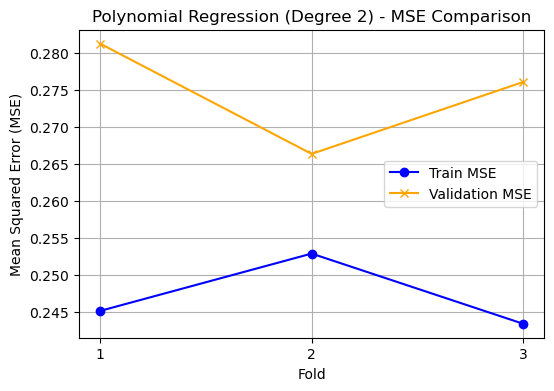

In [1143]:
# Polynomial Regression with Normal Equation
model = LinearRegression()

kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_losses, val_losses = [], []

for train_index, val_index in kf.split(X_train_poly):
    X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_kf, y_train_kf)

    train_mse = mean_squared_error(y_train_kf, model.predict(X_train_kf))
    val_mse = mean_squared_error(y_val_kf, model.predict(X_val_kf))

    train_losses.append(train_mse)
    val_losses.append(val_mse)

cv_mse = np.mean(val_losses)
test_mse_poly_ne = mean_squared_error(y_test, model.predict(X_test_poly))
r2_poly_ne = r2_score(y_test, model.predict(X_test_poly))

print(f"Polynomial Regression (Normal Equation, Degree {degree}) - Test MSE: {test_mse_poly_ne:.4f}, CV MSE: {cv_mse:.4f}, R² Score: {r2_poly_ne:.4f}")

epochs = np.arange(1, len(train_losses) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_losses, label='Train MSE', marker='o', color='blue')
plt.plot(epochs, val_losses, label='Validation MSE', marker='x', color='orange')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'Polynomial Regression (Degree {degree}) - MSE Comparison')
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

Polynomial Regression (SGD, Degree 2) - Test MSE: 0.2366, CV MSE: 0.2744, R² Score: 0.7565


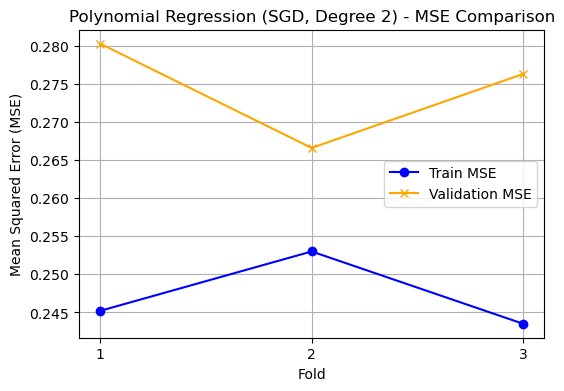

In [1145]:
# Polynomial Regression with SGD
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, learning_rate='adaptive', eta0=0.01)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_losses, val_losses = [], []

for train_index, val_index in kf.split(X_train_poly):
    X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    sgd_model.fit(X_train_kf, y_train_kf)

    train_mse = mean_squared_error(y_train_kf, sgd_model.predict(X_train_kf))
    val_mse = mean_squared_error(y_val_kf, sgd_model.predict(X_val_kf))

    train_losses.append(train_mse)
    val_losses.append(val_mse)

cv_mse = np.mean(val_losses)
test_mse_poly_sgd = mean_squared_error(y_test, sgd_model.predict(X_test_poly))
r2_poly_sgd = r2_score(y_test, sgd_model.predict(X_test_poly))

print(f"Polynomial Regression (SGD, Degree {degree}) - Test MSE: {test_mse_poly_sgd:.4f}, CV MSE: {cv_mse:.4f}, R² Score: {r2_poly_sgd:.4f}")

epochs = np.arange(1, len(train_losses) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_losses, label='Train MSE', marker='o', color='blue')
plt.plot(epochs, val_losses, label='Validation MSE', marker='x', color='orange')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'Polynomial Regression (SGD, Degree {degree}) - MSE Comparison')
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

**Question-F Part 2**

In [1148]:
# Function to evaluate Ridge, Lasso, and ElasticNet with Polynomial Features
def evaluate_models_with_poly_kfold(models, alphas):
    best_scores = {
        'Ridge Regression': {'best_mse': float('inf'), 'best_r2': float('-inf')},
        'Lasso Regression': {'best_mse': float('inf'), 'best_r2': float('-inf')},
        'ElasticNet Regression': {'best_mse': float('inf'), 'best_r2': float('-inf')}
    }
    
    best_ridge_model = None
    best_lasso_model = None
    best_elasticnet_model = None
    
    train_losses = {'Ridge Regression': [], 'Lasso Regression': [], 'ElasticNet Regression': []}
    val_losses = {'Ridge Regression': [], 'Lasso Regression': [], 'ElasticNet Regression': []}
    
    for model_name, model_class in models.items():
        for alpha in alphas:
            model = model_class(alpha=alpha)
            kf = KFold(n_splits=3, shuffle=True, random_state=42)
            fold_train_losses = []
            fold_val_losses = []

            for train_index, val_index in kf.split(X_train_poly):
                X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
                y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

                model.fit(X_train_kf, y_train_kf)

                train_mse = mean_squared_error(y_train_kf, model.predict(X_train_kf))
                val_mse = mean_squared_error(y_val_kf, model.predict(X_val_kf))
                
                fold_train_losses.append(train_mse)
                fold_val_losses.append(val_mse)

            # Store mean of train/val losses for the current alpha
            train_losses[model_name].append(np.mean(fold_train_losses))
            val_losses[model_name].append(np.mean(fold_val_losses))

            # Evaluate on test set
            test_predictions = model.predict(X_test_poly)
            test_mse = mean_squared_error(y_test, test_predictions)
            r2_value = r2_score(y_test, test_predictions)

            print(f"{model_name} (alpha={alpha}) - Test MSE: {test_mse:.4f}, "
                  f"CV Train MSE: {np.mean(fold_train_losses):.4f}, "
                  f"CV Val MSE: {np.mean(fold_val_losses):.4f}, R² Score: {r2_value:.4f}")

            # Update best scores and models for each model type
            if model_name == 'Ridge Regression' and test_mse < best_scores[model_name]['best_mse']:
                best_scores[model_name]['best_mse'] = test_mse
                best_scores[model_name]['best_r2'] = r2_value
                best_ridge_model = model  
            
            if model_name == 'Lasso Regression' and test_mse < best_scores[model_name]['best_mse']:
                best_scores[model_name]['best_mse'] = test_mse
                best_scores[model_name]['best_r2'] = r2_value
                best_lasso_model = model 
            
            if model_name == 'ElasticNet Regression' and test_mse < best_scores[model_name]['best_mse']:
                best_scores[model_name]['best_mse'] = test_mse
                best_scores[model_name]['best_r2'] = r2_value
                best_elasticnet_model = model  

    return (best_scores, best_ridge_model, best_lasso_model, best_elasticnet_model)

# Models and alpha values
models = {
    'Ridge Regression': Ridge,
    'Lasso Regression': Lasso,
    'ElasticNet Regression': ElasticNet
}

alphas = [0.01, 0.1, 1.0]

# Evaluate models and return scores
best_scores, best_ridge_model, best_lasso_model, best_elasticnet_model = evaluate_models_with_poly_kfold(models, alphas)

# Print final results
print("\nBest Scores:", best_scores)

Ridge Regression (alpha=0.01) - Test MSE: 0.2354, CV Train MSE: 0.2471, CV Val MSE: 0.2746, R² Score: 0.7577
Ridge Regression (alpha=0.1) - Test MSE: 0.2353, CV Train MSE: 0.2471, CV Val MSE: 0.2746, R² Score: 0.7578
Ridge Regression (alpha=1.0) - Test MSE: 0.2347, CV Train MSE: 0.2471, CV Val MSE: 0.2744, R² Score: 0.7584
Lasso Regression (alpha=0.01) - Test MSE: 0.2219, CV Train MSE: 0.2572, CV Val MSE: 0.2732, R² Score: 0.7716
Lasso Regression (alpha=0.1) - Test MSE: 0.2527, CV Train MSE: 0.3117, CV Val MSE: 0.3190, R² Score: 0.7399
Lasso Regression (alpha=1.0) - Test MSE: 0.9728, CV Train MSE: 1.0196, CV Val MSE: 1.0223, R² Score: -0.0013
ElasticNet Regression (alpha=0.01) - Test MSE: 0.2230, CV Train MSE: 0.2525, CV Val MSE: 0.2728, R² Score: 0.7704
ElasticNet Regression (alpha=0.1) - Test MSE: 0.2286, CV Train MSE: 0.2816, CV Val MSE: 0.2902, R² Score: 0.7647
ElasticNet Regression (alpha=1.0) - Test MSE: 0.6708, CV Train MSE: 0.7450, CV Val MSE: 0.7485, R² Score: 0.3095

Best Sco

**Impact of Different Penalty Terms:**

1. **Ridge Regression:** Ridge regression performed consistently well across different penalty values (alpha). For instance, with an alpha of 1.0, the Test MSE was 0.2347, and the Cross-Validation (CV) MSE was 0.2744. Even when using a lower alpha of 0.01, the Test MSE was close at 0.2354, demonstrating that Ridge can effectively handle regularization without significantly sacrificing model accuracy, even with stronger penalties.

2. **Lasso Regression:** In contrast, Lasso regression struggled more as the penalty increased. With a small alpha of 0.01, it achieved a Test MSE of 0.2219 and a CV MSE of 0.2732. However, as the alpha increased to 0.1, the Test MSE rose to 0.2527. At an alpha of 1.0, the model became overly simplified, leading to a Test MSE of 0.9728 and a CV MSE of 1.0223, indicating that excessive regularization with Lasso can result in poor model performance (underfitting).

3. **ElasticNet Regression:** ElasticNet exhibited similar behavior to Lasso, performing better with smaller penalty values. With an alpha of 0.01, it had a Test MSE of 0.2230 and a CV MSE of 0.2728. However, as the alpha increased to 0.1, the Test MSE rose to 0.2286. At an alpha of 1.0, the performance dropped further, with a Test MSE of 0.6708 and a CV MSE of 0.7485. This illustrates that stronger penalties negatively impact ElasticNet's performance as well, emphasizing the importance of careful tuning of the penalty.

**Question-F Part 3**

In [1152]:
# Polynomial Regression with SGD with varying learning rates and batch sizes
learning_rates = [0.01, 0.1, 1.0]
batch_sizes = [16, 32, 64]

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1000, tol=1e-3)
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        val_losses = []

        for train_index, val_index in kf.split(X_train_poly):
            X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
            y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

            for i in range(0, len(X_train_kf), batch_size):
                end = min(i + batch_size, len(X_train_kf))
                model.partial_fit(X_train_kf[i:end], y_train_kf[i:end])

            val_mse = mean_squared_error(y_val_kf, model.predict(X_val_kf))
            val_losses.append(val_mse)

        # Evaluate on the test set
        test_predictions = model.predict(X_test_poly)
        test_mse = mean_squared_error(y_test, test_predictions)
        r2_value = r2_score(y_test, test_predictions)

        print(f"SGD (LR: {lr}, Batch Size: {batch_size}) - Test MSE: {test_mse:.4f}, "
              f"CV MSE: {np.mean(val_losses):.4f}, R² Score: {r2_value:.4f}")

SGD (LR: 0.01, Batch Size: 16) - Test MSE: 0.4804, CV MSE: 0.9329, R² Score: 0.5055
SGD (LR: 0.01, Batch Size: 32) - Test MSE: 0.3804, CV MSE: 1.0363, R² Score: 0.6085
SGD (LR: 0.01, Batch Size: 64) - Test MSE: 0.3464, CV MSE: 0.9496, R² Score: 0.6434
SGD (LR: 0.1, Batch Size: 16) - Test MSE: 12630289850764751194292224.0000, CV MSE: 23599482471380157439410176.0000, R² Score: -13000860003410889064579072.0000
SGD (LR: 0.1, Batch Size: 32) - Test MSE: 16055520058842081010909184.0000, CV MSE: 12763566445164909178126336.0000, R² Score: -16526585773827075214409728.0000
SGD (LR: 0.1, Batch Size: 64) - Test MSE: 16706722968023323084062720.0000, CV MSE: 20164757533938767133409280.0000, R² Score: -17196894844807471280685056.0000
SGD (LR: 1.0, Batch Size: 16) - Test MSE: 624030721552992900818665472.0000, CV MSE: 1704670747780480848225107968.0000, R² Score: -642339656856466573171359744.0000
SGD (LR: 1.0, Batch Size: 32) - Test MSE: 1360475399751685740215402496.0000, CV MSE: 25663923967455362304358

**Findings:**

The results indicate that both the learning rate and batch size significantly impact the model's performance. With a learning rate of 0.01 and a batch size of 64, the model achieved a Test MSE of 0.3464. This was the best performance for this learning rate. However, increasing the batch size to 32 resulted in a lower Test MSE of 0.3804, while a batch size of 16 led to a higher Test MSE of 0.4804, showing variability in performance with smaller batch sizes. When the learning rate was increased to 0.1, the model's performance deteriorated drastically, with extremely large Test MSE values, such as 12630289850764751194292224.0000 for a batch size of 16. This indicates that the model struggled significantly to fit the data properly at this higher learning rate. In summary, smaller learning rates like 0.01 combined with moderate batch sizes yield more reliable and consistent results, highlighting the importance of careful tuning of these hyperparameters for optimal model performance.

**Description of Models used:**

1. **Polynomial Features with Linear Regression:** This model takes the original features and transforms them into more complex versions (like squares or cubes) to capture patterns that a simple straight line can’t. After that, Linear Regression is used to find the best fit for these transformed features.

2. **Polynomial Features with SGD (Stochastic Gradient Descent):** Like the previous model, this one also uses polynomial features, but instead of finding the best fit all at once, it uses an iterative method (SGD) to gradually adjust the model based on small parts of the training data. This makes it useful for large datasets.

3. **Ridge Regression:** Ridge adds a bit of “penalty” to the model to prevent it from overfitting (getting too specific to the training data). When used with polynomial features, it helps keep the model simple by keeping the weights (or coefficients) small, which improves its performance on new, unseen data.

4. **Lasso Regression:** Similar to Ridge, Lasso also adds a penalty but goes a step further by shrinking some of the coefficients all the way down to zero. This means it automatically ignores less important features, which helps in simplifying the model.

5. **Elastic Net Regression:** Elastic Net is a mix of both Ridge and Lasso. It’s helpful when features are highly related to each other, as it balances between keeping the model simple and selecting the most important features.

# **G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.**

**Question-G Part -1 & 2**

In [1158]:
# Create a summary table for MSE and R² values for all models
results = {
    "Model": [
        "Linear Regression (Closed Form)", 
        "SGD Regressor", 
        "Ridge Regression", 
        "Lasso Regression", 
        "ElasticNet Regression", 
        "Polynomial Regression with Normal Equation", 
        "Polynomial Regression with SGD",
        "Polynomial Regression Ridge",
        "Polynomial Regression Lasso",
        "Polynomial Regression ElasticNet"
    ],
    
    "Test MSE": [
        test_mse_linear, 
        test_mse_sgd, 
        best_mse_ridge, 
        best_mse_lasso, 
        best_mse_elastic, 
        test_mse_poly_ne, 
        test_mse_poly_sgd,
        best_scores['Ridge Regression']['best_mse'], 
        best_scores['Lasso Regression']['best_mse'], 
        best_scores['ElasticNet Regression']['best_mse'], 
    ],

    "R² Score": [
        r2_linear, 
        r2_sgd, 
        best_r2_ridge, 
        best_r2_lasso, 
        best_r2_elastic, 
        r2_poly_ne, 
        r2_poly_sgd,
        best_scores['Ridge Regression']['best_r2'], 
        best_scores['Lasso Regression']['best_r2'], 
        best_scores['ElasticNet Regression']['best_r2'], 
    ],
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a tabular form
print("Model Performance Summary:")
print(results_df)

Model Performance Summary:
                                        Model  Test MSE  R² Score
0             Linear Regression (Closed Form)  0.236963  0.756085
1                               SGD Regressor  0.247383  0.745359
2                            Ridge Regression  0.236956  0.756092
3                            Lasso Regression  0.236806  0.756246
4                       ElasticNet Regression  0.236773  0.756280
5  Polynomial Regression with Normal Equation  0.235406  0.757687
6              Polynomial Regression with SGD  0.236566  0.756493
7                 Polynomial Regression Ridge  0.234702  0.758412
8                 Polynomial Regression Lasso  0.221936  0.771552
9            Polynomial Regression ElasticNet  0.223018  0.770439


**Conclusion:**

1. The best-performing model is Polynomial Regression with Lasso, which has the lowest Test MSE of 0.221936 and a strong R² score of 0.771552. This shows that polynomial regression effectively captures complex patterns in the data.

2. Regularization techniques like Ridge, Lasso, and ElasticNet improved performance compared to standard linear regression by reducing overfitting and enhancing generalization to new data. Both Lasso and Ridge outperformed traditional linear regression, showing the value of regularization in creating better models.

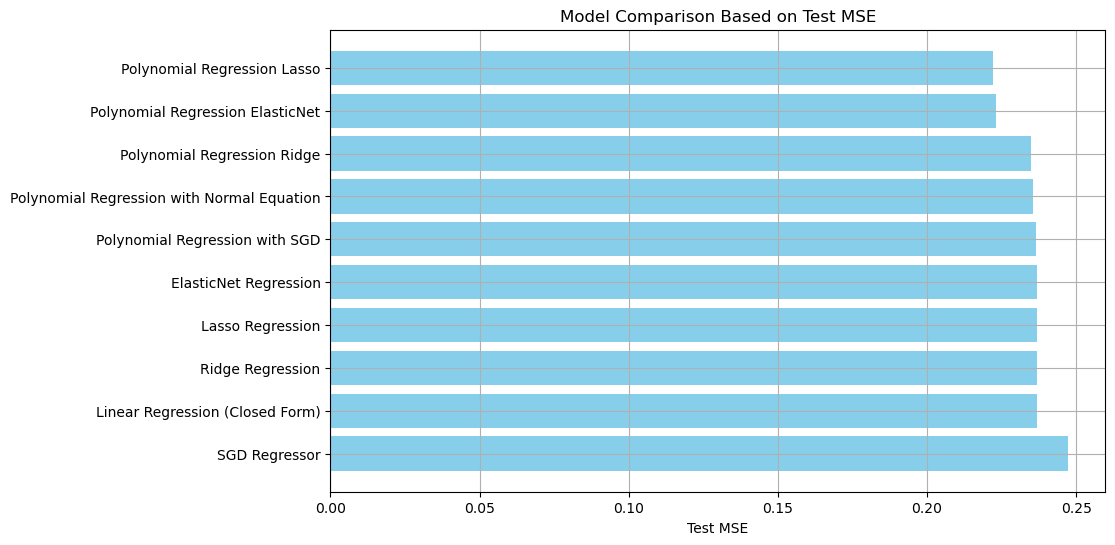

In [1166]:
results_df_sorted = results_df.sort_values(by="Test MSE", ascending=False)

# Plotting the Test MSE for each model
plt.figure(figsize=(10, 6))
plt.barh(results_df_sorted["Model"], results_df_sorted["Test MSE"], color='skyblue')
plt.xlabel('Test MSE')
plt.title('Model Comparison Based on Test MSE')
plt.grid(True)
plt.show()

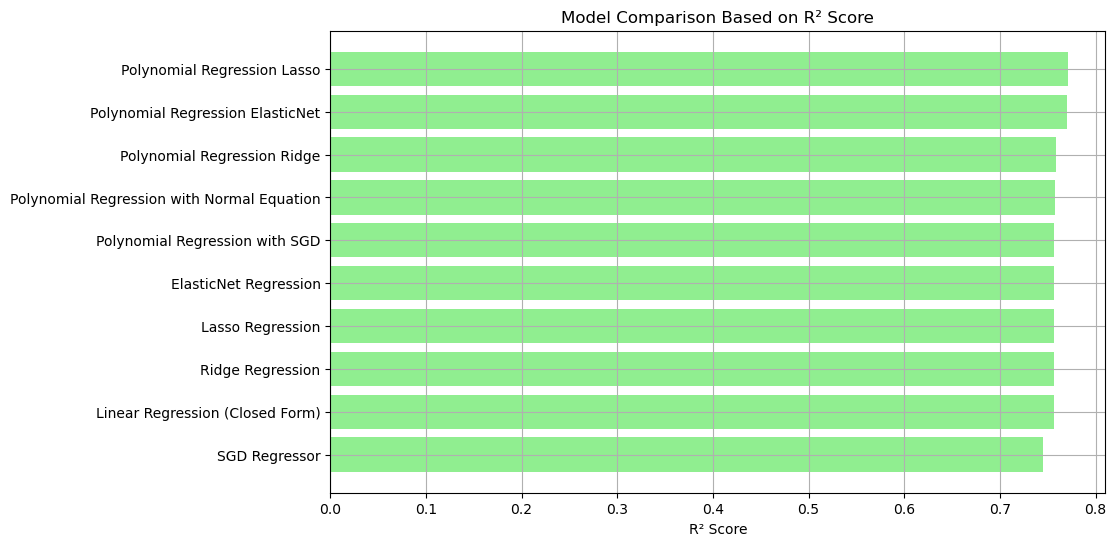

In [1168]:
# Sort the DataFrame by 'R² Score' in ascending order
results_df_sorted_r2 = results_df.sort_values(by="R² Score", ascending=True)

# Plotting the R² Score for each model
plt.figure(figsize=(10, 6))
plt.barh(results_df_sorted_r2["Model"], results_df_sorted_r2["R² Score"], color='lightgreen')
plt.xlabel('R² Score')
plt.title('Model Comparison Based on R² Score')
plt.grid(True)
plt.show()

**Prediction on the Test Labels**

In [1173]:
# Make predictions using the best model - Polynomial Regression lasso
y_pred_lasso = best_lasso_model.predict(X_test_poly)  # X_test_poly - test features

test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)  # y_test - actual test labels
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Best Model: Polynomial Regression with Lasso")
print(f"Test MSE: {test_mse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")

# Create a DataFrame for actual vs predicted results
results_df_lasso = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lasso
})

print("\nActual vs Predicted Results ->")
print("\n")
print(results_df_lasso.to_string(index=True))

Best Model: Polynomial Regression with Lasso
Test MSE: 0.2219
R² Score: 0.7716

Actual vs Predicted Results ->


      Actual  Predicted
1464   7.533   7.324906
413    4.609   4.955108
838    5.939   6.025250
490    3.801   4.382543
1155   6.690   6.935971
1431   6.631   6.277878
1625   5.317   4.899961
438    6.272   5.888273
720    4.586   4.938760
1110   6.325   5.516391
270    3.703   4.340992
1601   5.206   5.022708
617    5.494   5.351733
1298   3.471   5.173537
210    6.359   5.562754
1602   5.464   5.034796
1542   3.832   4.565164
1175   3.347   4.580794
383    5.786   5.917362
240    7.418   7.197765
1520   6.476   5.768726
946    6.116   5.891701
212    5.772   5.749633
251    4.310   4.694526
367    5.754   5.513292
495    4.196   4.278208
555    5.362   5.984429
918    6.118   6.596442
425    5.801   5.744313
23     4.434   4.290516
1401   5.653   6.018307
1525   7.219   6.825038
522    5.821   5.581905
244    5.741   6.093354
781    3.460   3.944652
1046   3.980   3.979302

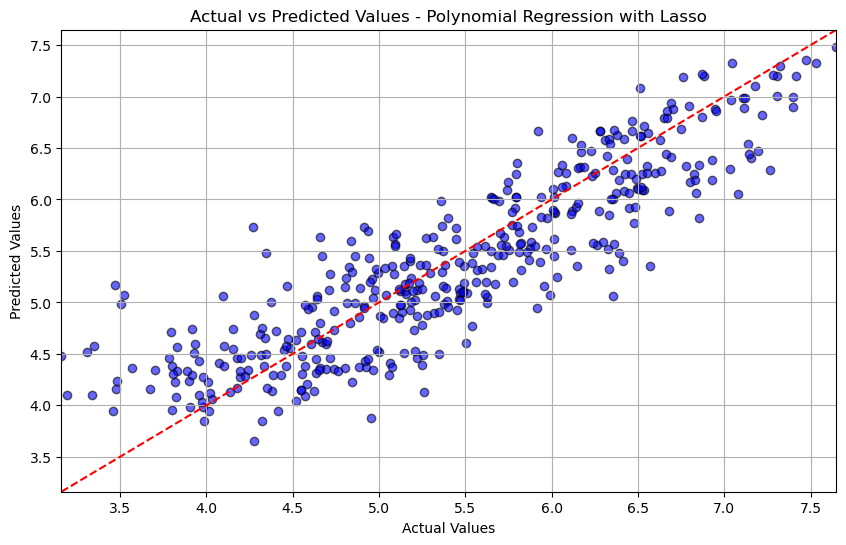

In [1182]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.title('Actual vs Predicted Values - Polynomial Regression with Lasso')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.show()

**Future Work**

1. **Tuning Hyperparameters:**
   
We could spend some time adjusting the hyperparameters, like the learning rate for the SGD model or the alpha values for Ridge, Lasso, and ElasticNet. This could help us get even better results. To make this easier, we could use techniques like grid search or random search to test different combinations of these settings systematically.

2. **Trying More Advanced Models:**
   
It might be worth looking into more advanced models like Random Forests or Gradient Boosting. These models are great at handling complex relationships in the data and could give us better predictions. Additionally, if we have a larger dataset, we could explore using neural networks, which are particularly good at picking up on intricate patterns.

**References**

1. https://openai.com/chatgpt/
2. https://www.geeksforgeeks.org/
3. https://stackoverflow.com/